In [5]:
import awkward as ak
import uproot
from glob import glob
import numpy as np

import hist as hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy import stats
import matplotlib.colors as mcolors
import os

In [6]:
branches = ["gpz","gpx","ge","gvz","dimuon_mass","n_dimuons"]

In [7]:
def get_info_from_file(filename):
    x = filename.split('\\')[-1].split('_')
    beam = x[0][:2]
    mass = x[0][6:9]
    return beam,mass

def get_files(idir):
    file_dict = {'15':{},
                 '20':{},
                }
    files = [os.path.normpath(f) for f in glob(f'{idir}/*.root') if f != '']
    for f in files:
        beam,mass = get_info_from_file(f)
        print(f)
        if f"{mass}" not in file_dict[beam].keys():
            file_dict[beam][f"{mass}"] = f
    return file_dict


files = get_files("data/iron/")
print(files)

data\iron\15beam0.3mass_hepmc.txt.root
data\iron\15beam0.5mass_hepmc.txt.root
data\iron\15beam0.7mass_hepmc.txt.root
data\iron\15beam0.9mass_hepmc.txt.root
data\iron\20beam0.3mass_hepmc.txt.root
data\iron\20beam0.5mass_hepmc.txt.root
data\iron\20beam0.7mass_hepmc.txt.root
data\iron\20beam0.9mass_hepmc.txt.root
{'15': {'0.3': 'data\\iron\\15beam0.3mass_hepmc.txt.root', '0.5': 'data\\iron\\15beam0.5mass_hepmc.txt.root', '0.7': 'data\\iron\\15beam0.7mass_hepmc.txt.root', '0.9': 'data\\iron\\15beam0.9mass_hepmc.txt.root'}, '20': {'0.3': 'data\\iron\\20beam0.3mass_hepmc.txt.root', '0.5': 'data\\iron\\20beam0.5mass_hepmc.txt.root', '0.7': 'data\\iron\\20beam0.7mass_hepmc.txt.root', '0.9': 'data\\iron\\20beam0.9mass_hepmc.txt.root'}}


In [11]:
hists = {
    "vx": hist.Hist(
        hist.axis.StrCategory([], name='mass', growth=True),
        hist.axis.StrCategory([], name='beam', growth=True),
        hist.axis.Regular(50, 400, 500, name='vz', label=r"$v_z \mu$ [GeV]"),
        hist.axis.Regular(3, 0, 3, name='idx', label=r"idx"),
    ),
    "kin": hist.Hist(
        hist.axis.StrCategory([], name='mass', growth=True),
        hist.axis.StrCategory([], name='beam', growth=True),
        hist.axis.Regular(50, 0, 20, name='pz', label=r"$p_z \mu$ [GeV]"),
        hist.axis.Regular(50, -0.75, 0.75, name='px', label=r"$p_x \mu$ [GeV]"),
        hist.axis.Regular(3, 0, 3, name='idx', label=r"idx"),
    ),    
}

mass_toloop = ["0.3","0.5","0.9","0.7"]
beam_toloop = ["15","20"]

for beam in beam_toloop:
    for mass in mass_toloop:
        fname = files[beam][mass]
        print(fname)
        events = uproot.iterate(f"{fname}:Events",branches)
        for ev in events:
            for idx in range(3):
                hists["vx"].fill(
                        mass = mass,beam=beam,
                        vz = ev.gvz[:,idx],
                        idx = idx
                )
                hists["kin"].fill(
                        mass = mass,beam=beam,
                        pz = ev.gpz[:,idx],
                        px = ev.gpx[:,idx],
                        idx = idx
                )
            #print( ev.n_dimuons)
            #hists["mass"].fill(
            #        mass = mass,beam=beam,
            #        dimass = ev.dimuon_mass[0],
            #)
                
print(hists["kin"])

data\iron\15beam0.3mass_hepmc.txt.root
data\iron\15beam0.5mass_hepmc.txt.root
data\iron\15beam0.9mass_hepmc.txt.root
data\iron\15beam0.7mass_hepmc.txt.root
data\iron\20beam0.3mass_hepmc.txt.root
data\iron\20beam0.5mass_hepmc.txt.root
data\iron\20beam0.9mass_hepmc.txt.root
data\iron\20beam0.7mass_hepmc.txt.root
Hist(
  StrCategory(['0.3', '0.5', '0.9', '0.7'], growth=True, name='mass', label='mass'),
  StrCategory(['15', '20'], growth=True, name='beam', label='beam'),
  Regular(50, 0, 20, name='pz', label='$p_z \\mu$ [GeV]'),
  Regular(50, -0.75, 0.75, name='px', label='$p_x \\mu$ [GeV]'),
  Regular(3, 0, 3, name='idx', label='idx'),
  storage=Double()) # Sum: 119947.0 (120000.0 with flow)


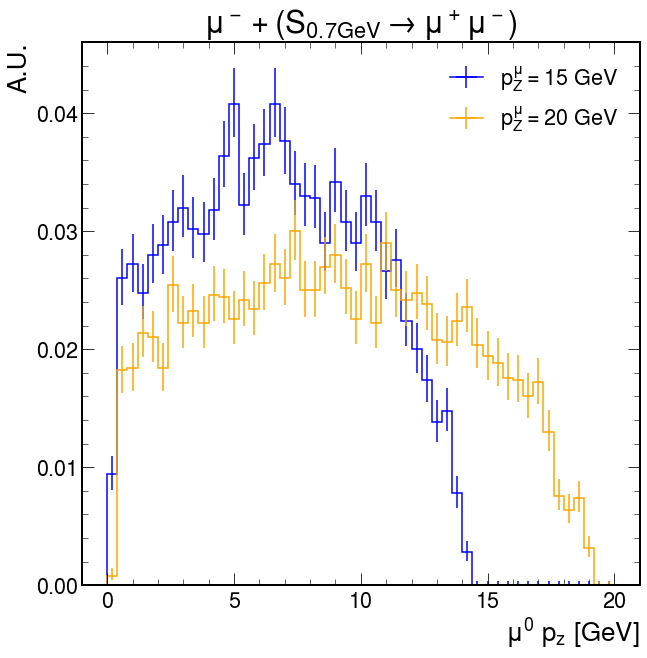

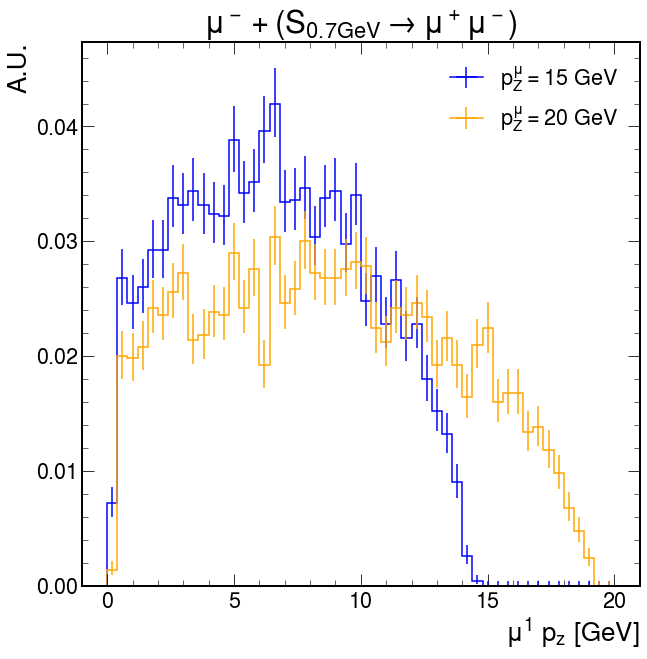

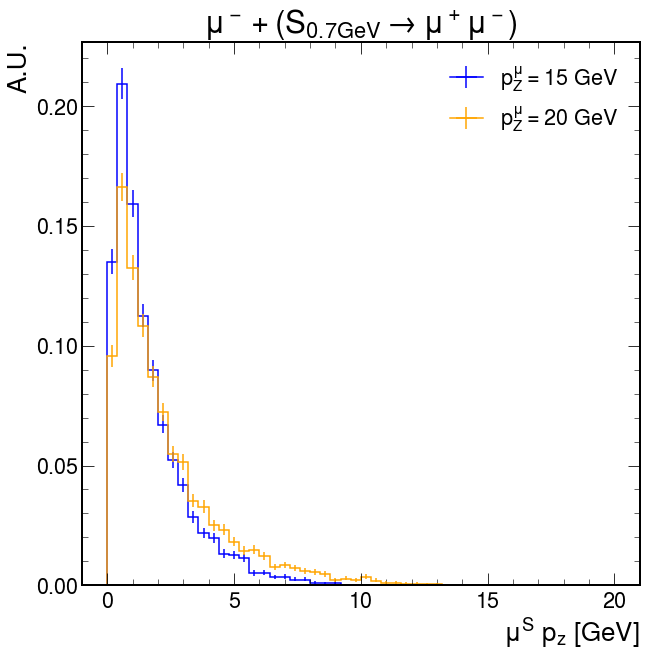

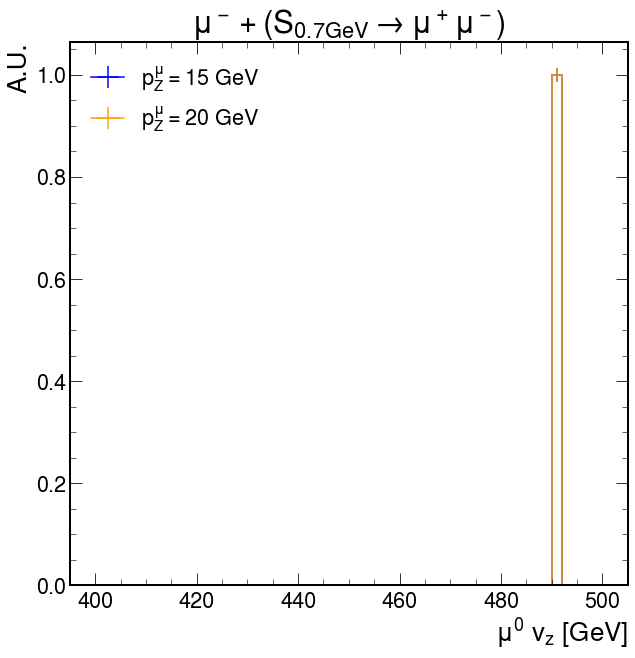

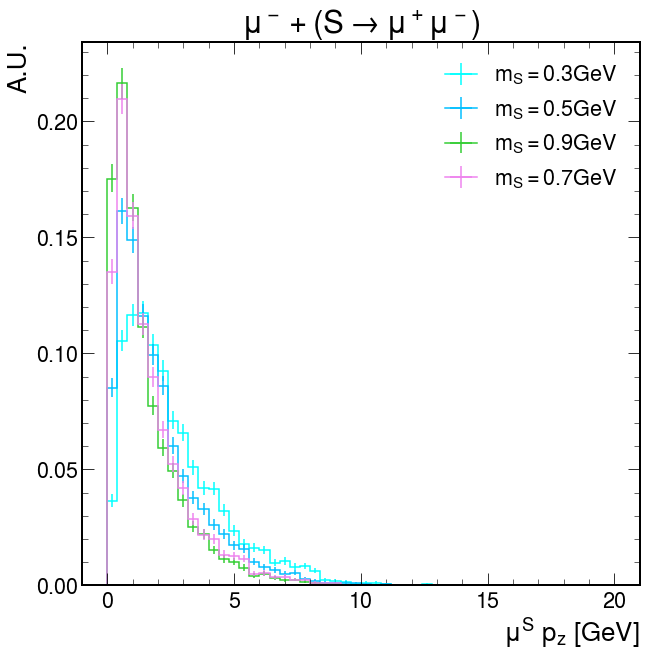

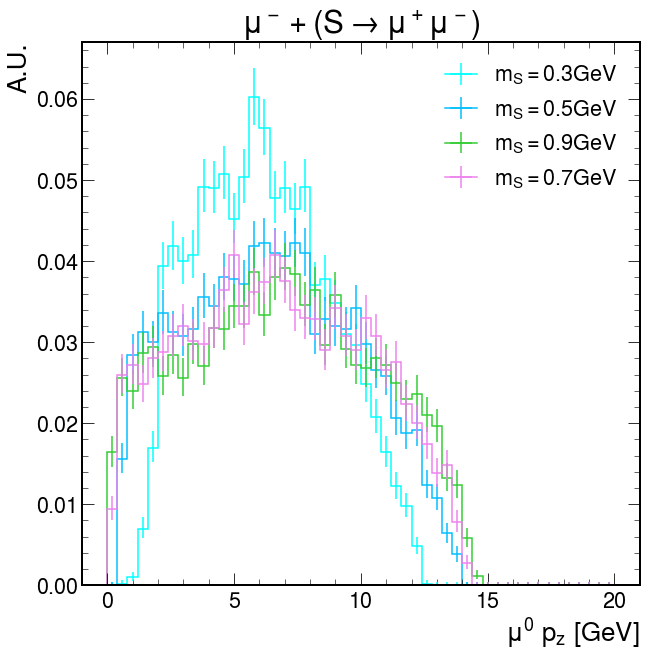

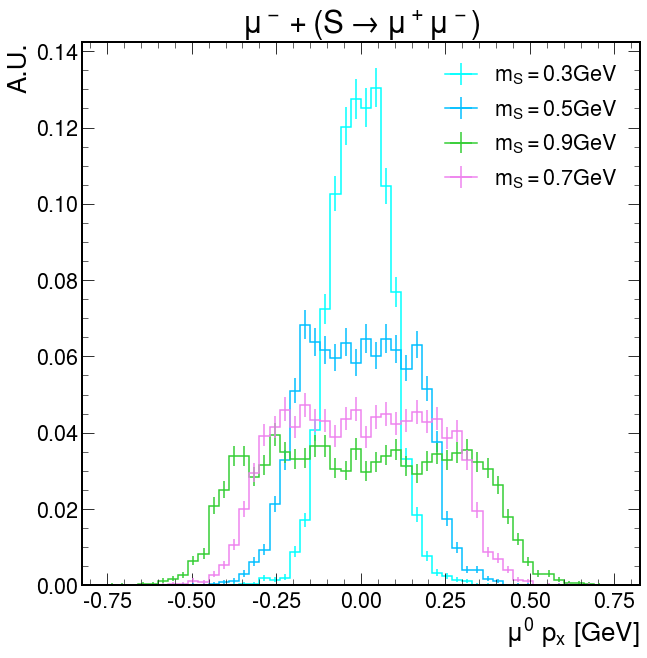

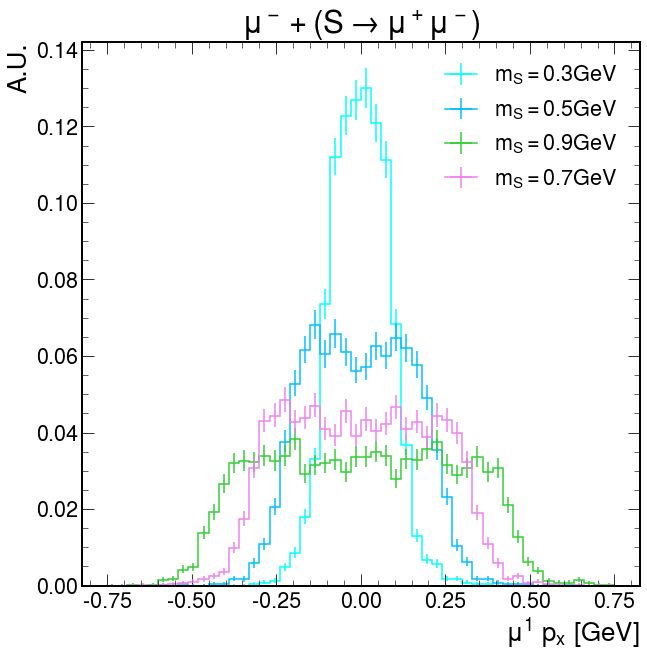

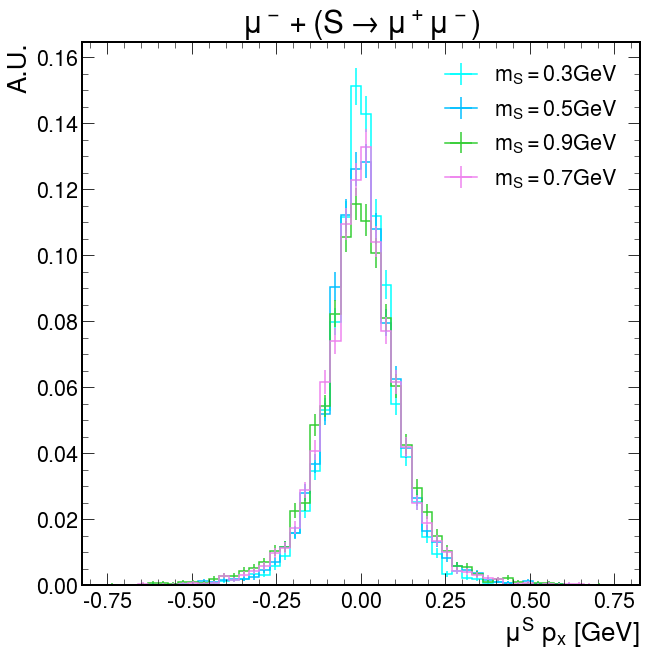

In [93]:
def plot_single(to_plot,labels,label,xlabel,colors,mass=None):
    fig, ax = plt.subplots(1, 1)

    hep.histplot(
        to_plot,
        ax=ax,
        label=labels,
        density=True,
        color=colors
    )
    if mass is not None:
        ax.set_title(r"$\mu^- + (S_{%s GeV} \rightarrow \mu^+\mu^-)$"%mass)
    else:
        ax.set_title(r"$\mu^- + (S \rightarrow \mu^+\mu^-)$")
    ax.legend()
    ax.set(
        ylabel="A.U.",
        xlabel=xlabel
    )
    fig.savefig(f"plots/trimuon/{label}.png")
        
mass = 0.7
colors_beam = ["blue","orange"]
colors_mass = [mcolors.CSS4_COLORS[c] for c in ["aqua","deepskyblue","limegreen","violet"]]
labels = [r"$p_Z^{\mu}=15$ GeV",r"$p_Z^{\mu}=20$ GeV"]
plot_single([hists["kin"][{"mass": f"{mass}","beam": b, "idx": 0, "px":sum}] for b in beam_toloop],
            labels,
            f"pz_{mass}_0",r"$\mu^0$ $p_z$ [GeV]",colors_beam,mass)
plot_single([hists["kin"][{"mass": f"{mass}","beam": b, "idx": 1, "px":sum}] for b in beam_toloop],
            labels,
            f"pz_{mass}_1",r"$\mu^1$ $p_z$ [GeV]",colors_beam,mass)
plot_single([hists["kin"][{"mass": f"{mass}","beam": b, "idx": 2, "px":sum}] for b in beam_toloop],
            labels,
            f"pz_{mass}_S",r"$\mu^S$ $p_z$ [GeV]",colors_beam,mass)
plot_single([hists["vx"][{"mass": f"{mass}","beam": b, "idx": 0}] for b in beam_toloop],
            labels,
            f"vz_{mass}_0",r"$\mu^0$ $v_z$ [GeV]",colors_beam,mass)

plot_single([hists["kin"][{"mass": f"{m}","beam": "15", "idx": 2, "px":sum}] for m in mass_toloop],
            [r"$m_S = %s GeV$"%m for m in mass_toloop],
            f"pz_S",r"$\mu^S$ $p_z$ [GeV]",colors_mass)
plot_single([hists["kin"][{"mass": f"{m}","beam": "15", "idx": 0, "px":sum}] for m in mass_toloop],
            [r"$m_S = %s GeV$"%m for m in mass_toloop],
            f"pz_0",r"$\mu^0$ $p_z$ [GeV]",colors_mass)

plot_single([hists["kin"][{"mass": f"{m}","beam": "15", "idx": 0, "pz":sum}] for m in mass_toloop],
            [r"$m_S = %s GeV$"%m for m in mass_toloop],
            f"px_0",r"$\mu^0$ $p_x$ [GeV]",colors_mass)
plot_single([hists["kin"][{"mass": f"{m}","beam": "15", "idx": 1, "pz":sum}] for m in mass_toloop],
            [r"$m_S = %s GeV$"%m for m in mass_toloop],
            f"px_1",r"$\mu^1$ $p_x$ [GeV]",colors_mass)
plot_single([hists["kin"][{"mass": f"{m}","beam": "15", "idx": 2, "pz":sum}] for m in mass_toloop],
            [r"$m_S = %s GeV$"%m for m in mass_toloop],
            f"px_S",r"$\mu^S$ $p_x$ [GeV]",colors_mass)

In [88]:
def getData(fname="", treeName="Events"):
    dq_dict_ak1 = uproot.lazy(fname+":"+treeName)
    dq_events = ak.zip({
                        "nTrack": ak.zip({
                                "n_tracks": dq_dict_ak1['n_tracks']
                        }),
                        "event_weight": ak.zip({
                                'weight': dq_dict_ak1['weight']
                        }),
                        "nDimuon": ak.zip({
                                "n_dimuons": dq_dict_ak1['n_dimuons']
                        }),
                        "GenVertex": ak.zip({
                                            "x": dq_dict_ak1["gvx"],
                                            "y": dq_dict_ak1["gvy"],
                                            "z": dq_dict_ak1["gvz"],
                                            "px": dq_dict_ak1["gpx"],
                                            "py": dq_dict_ak1["gpy"],
                                            "pz": dq_dict_ak1["gpz"]

                        }),
                        "GenP_St1": ak.zip({
                                            "px": dq_dict_ak1["gpx_st1"],
                                            "py": dq_dict_ak1["gpy_st1"],
                                            "pz": dq_dict_ak1["gpz_st1"],
                                            "x": dq_dict_ak1["gx_st1"],
                                            "y": dq_dict_ak1["gy_st1"],
                                            "z": dq_dict_ak1["gz_st1"],
                        }),
                        "Track_St1": ak.zip({
                                            "px": dq_dict_ak1["track_px_st1"],
                                            "py": dq_dict_ak1["track_py_st1"],
                                            "pz": dq_dict_ak1["track_pz_st1"],
                                            "x": dq_dict_ak1["track_x_st1"],
                                            "y": dq_dict_ak1["track_y_st1"],
                                            "z": dq_dict_ak1["track_z_st1"],
                        }),
                        "reco_dimuon": ak.zip({
                                            "mass": dq_dict_ak1["dimuon_mass"],
                                            "x": dq_dict_ak1["dimuon_x_vtx"],
                                            "y": dq_dict_ak1["dimuon_y_vtx"],
                                            "z": dq_dict_ak1["dimuon_z_vtx"],
                                            "chisq": dq_dict_ak1["dimuon_chisq"],
                            
                        }),
                        "truth_dimuon":ak.zip({
                                            "mass": dq_dict_ak1['truthdimuon_mass'],
                                            "x": dq_dict_ak1['truthdimuon_x_vtx'],
                                            "y": dq_dict_ak1['truthdimuon_y_vtx'],
                                            "z": dq_dict_ak1['truthdimuon_z_vtx'],
                                            "px": dq_dict_ak1['truthdimuon_px'],
                                            "py": dq_dict_ak1['truthdimuon_py'],
                                            "pz": dq_dict_ak1['truthdimuon_pz'],
                            
                        })
                       }, depth_limit=1)
    return dq_events

dq_data = {}
for beam in beam_toloop:
    for mass in mass_toloop:
        fname = files[beam][mass]
        dq_data[f"{beam}_{mass}"] = getData(fname)
        #print(events["truth_dimuon"].mass)

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


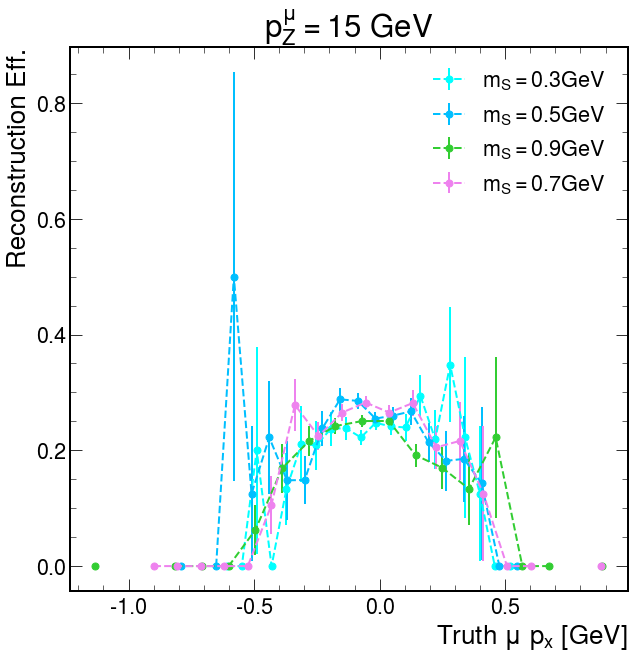

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


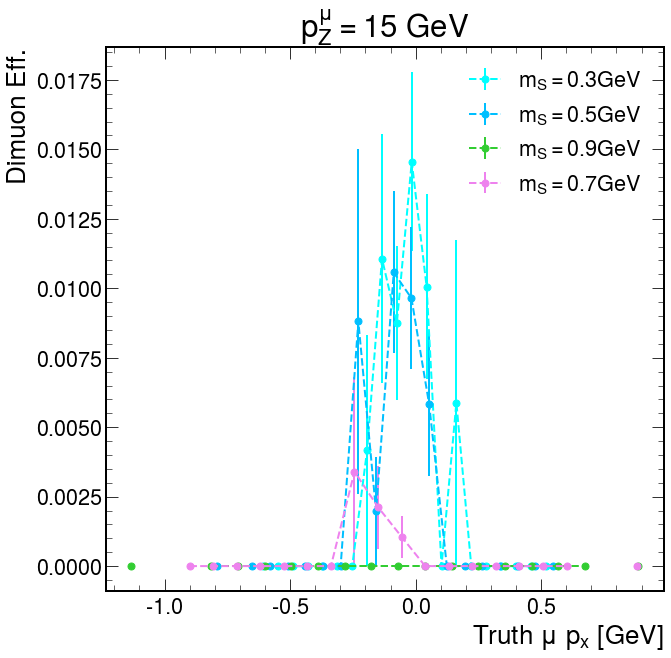

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


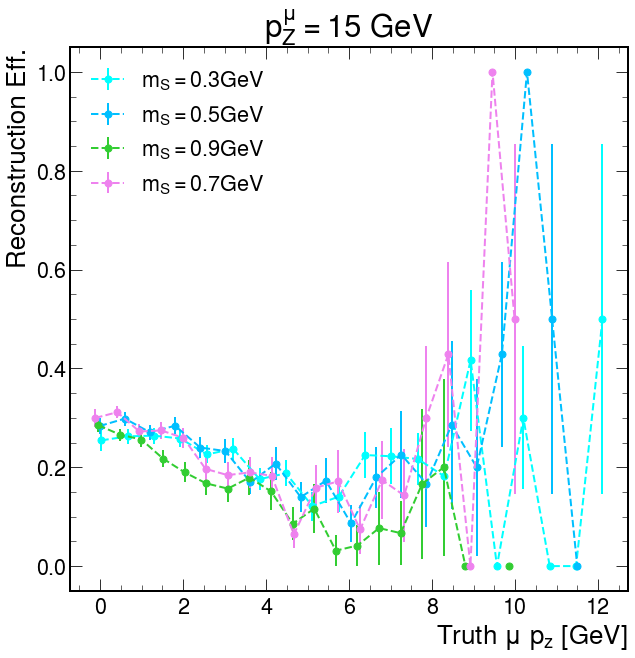

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


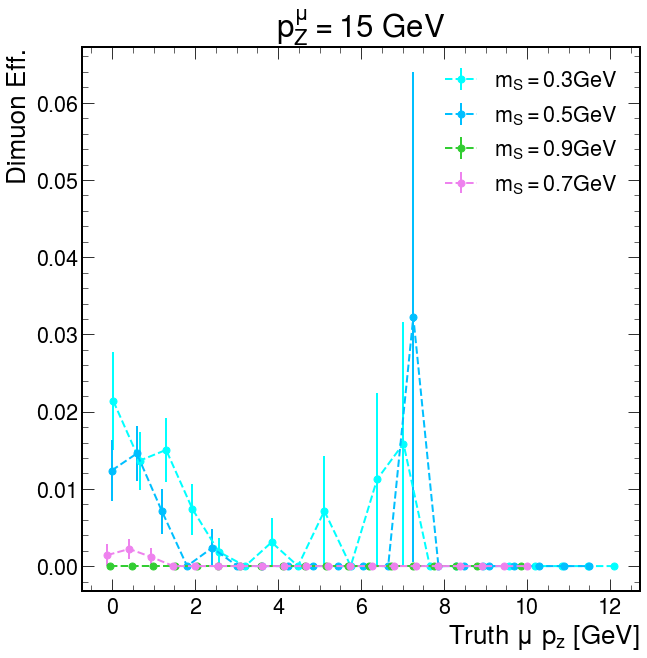

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


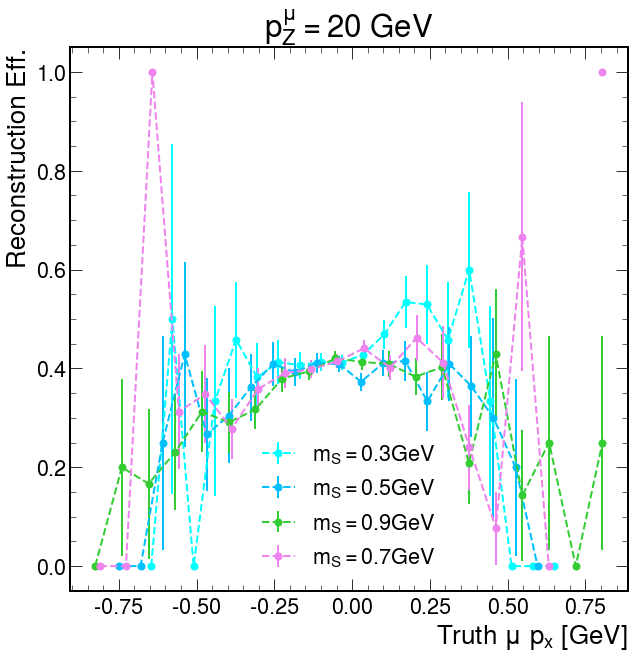

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


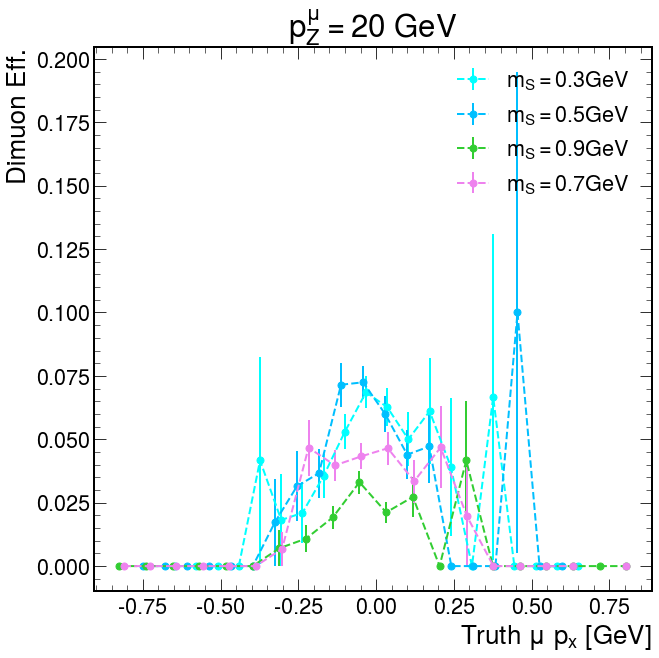

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


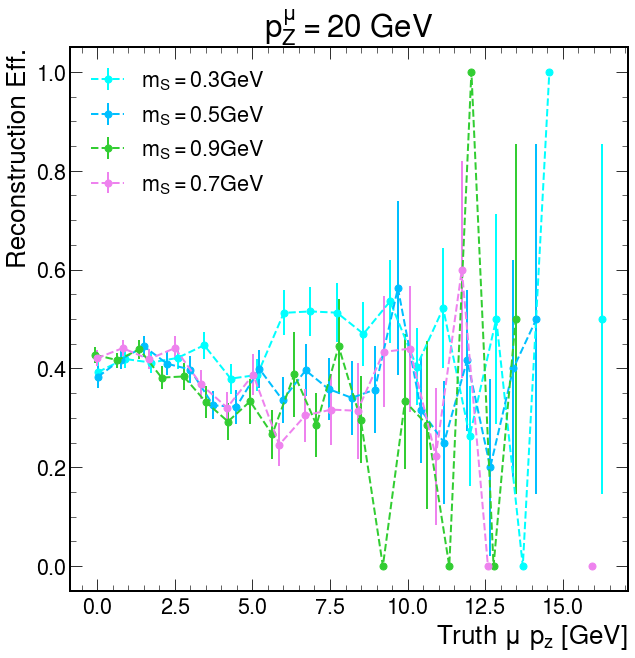

/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/Users/cmantill/miniconda3/envs/darkquest/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


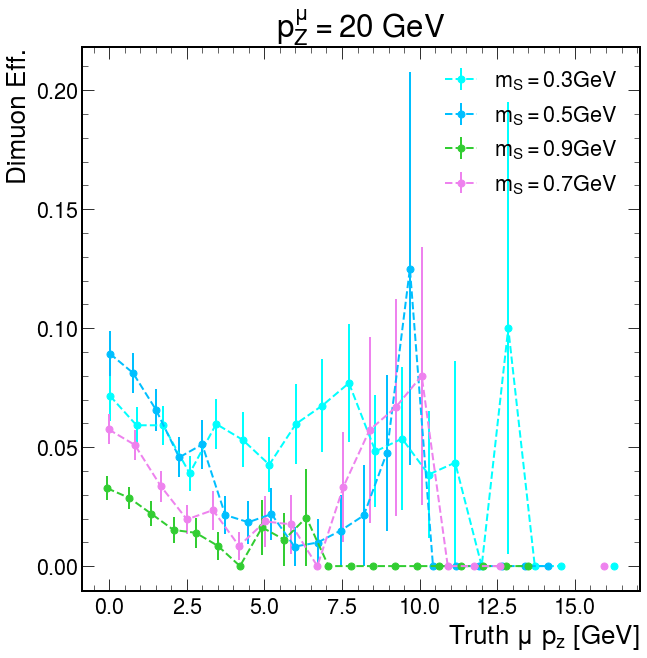

<Figure size 720x720 with 0 Axes>

In [94]:
def eff_1d(dq_data, p_cat = 'px', mass = "0.3", color = "turqoise", beam = "15", n="nTrack"):
    
    if  p_cat == 'px':
        p = np.asarray(ak.flatten(dq_data["GenVertex"].px[:,2:3]))
        x_label = r'Truth $\mu$ $p_x$ [GeV]'
    elif p_cat == 'py':
        p = np.asarray(ak.flatten(dq_data["GenVertex"].py[:,2:3]))
        x_label = r'Truth $\mu$ $p_y$ [GeV]'
    else:
        p = np.asarray(ak.flatten(dq_data["GenVertex"].pz[:,2:3]))
        x_label = r'Truth $\mu$ $p_z$ [GeV]'
   
    if n=="nTrack":
        ntracks = np.asarray(dq_data["nTrack"].n_tracks)
    else:
        ntracks = np.asarray(dq_data["nDimuon"].n_dimuons)
    #print(ntracks)
    #print(dq_data["GenVertex"].pz)
    #print(dq_data["GenVertex"].pz[:,1:3])
    
    bin_means, bin_edges, binnumber = stats.binned_statistic(p,
                                                             ntracks,
                                                             statistic='mean',
                                                             bins=20)
    
    bin_stds, _, _ = stats.binned_statistic(p,
                                            ntracks,
                                            statistic='std',
                                            bins=20)
    
    counts=[np.count_nonzero(binnumber==i) for i in np.arange(1,21,1)]
    
    plt.errorbar(bin_edges[:20],
                 bin_means,
                 bin_stds/np.sqrt(counts),
                 ls = '--',
                 fmt = 'o',
                 color = mcolors.CSS4_COLORS[color],
                 ms = 7,
                 lw = 2,
                 label=r'$m_S=%s GeV$'%mass)
    plt.title('$p_Z^{\mu}=%s$ GeV'%beam)
    plt.xlabel(x_label)
    plt.legend()
    if n=="nTrack":
        plt.ylabel(r'Reconstruction Eff.')
    else:
        plt.ylabel(r'Dimuon Eff.')
colors = ["aqua","deepskyblue","limegreen","violet"]
for beam in beam_toloop:
    for p in ["px","pz"]:
        for i,mass in enumerate(mass_toloop):
            eff_1d(dq_data[f"{beam}_{mass}"],p,mass,colors[i],beam)
        plt.savefig(f"plots/trimuon/{p}_tkeff_mass_{beam}.png")
        plt.show()
        plt.clf()
        
        for i,mass in enumerate(mass_toloop):
            eff_1d(dq_data[f"{beam}_{mass}"],p,mass,colors[i],beam,"nDimuon")
        plt.savefig(f"plots/trimuon/{p}_dimeff_mass_{beam}.png")
        plt.show()
        plt.clf()